<a href="https://colab.research.google.com/github/JeffreyXieCn/LearnAIML/blob/master/Python/PythonTraining/Part4-StatisticAnalysis/HEC_python_part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRNNMSrl6xvbfPjLuk9k3dl7VyNi0ky19x11A&usqp=CAU)

# **Introduction to Python for Data Science - Part 4 : Statistical Analysis**
Ericsson - August 4 to August 13, 2020

by Sarah Legendre Bilodeau, M Sc., HEC Montréal

Autors :
Sebastien Duguay,
Sarah Legendre Bilodeau

# Descriptive Statistics

A necessary aspect of working with data is the ability to describe, summarize, and represent data visually. Python statistics libraries are comprehensive, popular, and widely used tools that will assist you in working with data.

Descriptive statistics is about describing and summarizing data. It uses two main approaches:



1.   **The quantitative approach** describes and summarizes data numerically.
2.   **The visual approach** illustrates data with charts, plots, histograms, and other graphs.

You can apply descriptive statistics to one or many datasets or variables. When you describe and summarize a single variable, you’re performing univariate analysis. When you search for statistical relationships among a pair of variables, you’re doing a bivariate analysis. Similarly, a multivariate analysis is concerned with multiple variables at once.

We will cover the basic concept of common descriptive measures such as **the measure of center, the measure of variability, percentiles** and also the **construction of tables & graphs**. At the same time, the practical steps needed to handle those calculations of descriptive measures and to construct tables & graphs will be demonstrated using **Pandas** and **Seaborn**. 

## Types of data

Prior to starting any technical calculation and plotting works, this is very important to understand the type of data which are commonly seen in a statistical study. There are two main types of data: categorical data (qualitative) and numerical data (quantitative).



*   **Categorical data**: non-numerical information such as gender, race, religion, marital status etc.
*   **Numerical data**: measurement or count such as height, weight, age, salary, number of children, etc



In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import os
#os.chdir("/content/drive/My Drive/Colab Notebooks/Ericsson")

In [5]:
import pandas as pd

#path = "https://raw.githubusercontent.com/JeffreyXieCn/LearnAIML/master/Python/PythonTraining/Part2-NumpyAndPanda/Data_part2a/gapminder1.xlsx?token=AHAYCATE3GWEZN3XZHGH2BC7GU7U4"

pd.set_option('display.max_rows', 10)
path = "../Part2-NumpyAndPanda/Data_part2a/gapminder1.xlsx"

df_g = pd.read_excel(path, index_col=0)
print(df_g.shape)
# Application of the filter to keep only the year 1992 under study
df_1992 = df_g.loc[df_g["year"] == 1992]

# Use head() method of the data frame to show the first five rows of the data.          
df_g.head(5)

(1704, 6)


,country,continent,year,lifeExp,pop,gdpPercap
1,Afghanistan,Asia,1952,28.801,8425333,779.445314
2,Afghanistan,Asia,1957,30.332,9240934,820.853030
3,Afghanistan,Asia,1962,31.997,10267083,853.100710
4,Afghanistan,Asia,1967,34.020,11537966,836.197138
5,Afghanistan,Asia,1972,36.088,13079460,739.981106


*   As we can see, our dataset is made up of five variables (columns).
*   We can also see that these variables are of different types: text and numbers

The catagorical variables are usually text. The numerical values can be further divided in **continuous** and **discrete** variables.




**Pandas** also offer another useful method, *info()*, to get further details of the data type for each variable in our dataset.

In [6]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 1 to 1704
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 93.2+ KB


We we use the info() method, the Dtype column gives us the information about the data type we can find in that particular column. Generally speaking, the object data type will represent a categorical value. Continuous numerical values are of the float type and the discrete numerical values are represented by the int (integer) data type. 

## Mean and Median

One common way to summarize our numerical data is to find out the central tendency of our data. For example, we might want to know what is the most typical value of a certain variable in our dataset. To address this question, we can resort to the two most common measures of center: **mean** and **median**.

**The mean is an average of all the numbers of a particular variable.**

Using Python, it's quite easy to find it.

Using the Gapminder dataset, let's say we want to find the mean for the GDP per capita for the year 1992. This simple line produces exactly that.

In [7]:
print(df_1992.shape)
print(df_1992)
print("mean", df_1992["gdpPercap"].mean())
print("max", df_1992["gdpPercap"].max())
print("min", df_1992["gdpPercap"].min())
#print(df_1992["gdpPercap"].stat())

(142, 6)
                 country continent  year  lifeExp       pop    gdpPercap
9            Afghanistan      Asia  1992   41.674  16317921   649.341395
21               Albania    Europe  1992   71.581   3326498  2497.437901
33               Algeria    Africa  1992   67.744  26298373  5023.216647
45                Angola    Africa  1992   40.647   8735988  2627.845685
57             Argentina  Americas  1992   71.868  33958947  9308.418710
...                  ...       ...   ...      ...       ...          ...
1653             Vietnam      Asia  1992   67.662  69940728   989.023149
1665  West Bank and Gaza      Asia  1992   69.718   2104779  6017.654756
1677         Yemen, Rep.      Asia  1992   55.599  13367997  1879.496673
1689              Zambia    Africa  1992   46.100   8381163  1210.884633
1701            Zimbabwe    Africa  1992   60.377  10704340   693.420786

[142 rows x 6 columns]
mean 8158.608520688735
max 34932.91959
min 347.0


However, sometimes a mean can be misleading and may not effectively show a typical value in our dataset. This is because a mean might be influenced by the **outliers**.

**Outliers are the numbers which are either extremely high or extremely low compared to the rest of the numbers in a dataset**.



The median is the middle value of a sorted list of numbers. The steps required to get a median from a list of numbers are:
1.   sort the numbers from smallest to highest
2.   if the list has an odd number of values, the value in the middle position is the median.
3.   if the list has an even number of values, the average of the two values in the middle will be the median

Note: **A median is not influenced by the outliers**.

The choice we make either to use mean or median as a measure of center is dependent on the question we address. As a general rule, we should report both mean and median in our statistical study and let readers interpret the results themselves.






In [8]:
df_1992['gdpPercap'].median()

4386.085502

As we can see, the mean and the median are quite different in our case and further tools must be used to understand the data correctly.

## Measure of Variation

Variation is always observed in a dataset. It is very unusual to see an entire set of numbers share the exact same values as follows:


*   Data set 1 : 1 1 1 1 1 1 1 1 1 1 1 1
*   Data set 2 : 5 5 5 5 5 5 5 5 5 5 5 5

When comparing the difference/variability between two datasets, mean and median are not a good option to serve for that purpose. To explain this further, let us look at the two examples below:



*   Data set 1 : 100 200 300 400 500
*   Data set 2 : 1 2 300 499 698


Both datasets above share the same mean and median which is 300. However, they have a different level of variation. The numbers in the first dataset have a lower variation than the second one despite both of them share the same mean and median. Hence, we need another kind of measurement to examine the variability of our dataset.





## Standard Deviation 
One common method to measure the variation of our dataset is to calculate the standard deviation (SD). The SD is just a measurement to tell how a set of values spread out from their mean. A low SD shows that the values are close to the mean and a high SD shows a high diversion from the mean.

The steps to calculate SD are as follows:


1.   Calculate the mean of a dataset
2.   For each number in the dataset, subtract it with the mean
3.   Square the difference obtained from Step 2
4.   Sum up the results from Step 3
5.   Divide the summation from Step 4 by the number of values in the dataset minus one
6.   Square root the result from Step 5

Once again, Python offers us a simple solution to this long calculation.

Using the Gapminder data for 1992 and only for the African continent, we can see that countries from the same continent can have pretty different GDP per capita.




In [9]:
africa = df_1992.loc[df_1992["continent"] == "Africa"]
print("Mean: " + str(africa["gdpPercap"].mean()))
print("Median: " + str(africa["gdpPercap"].median()))
print("SD: " + str(africa["gdpPercap"].std()))


Mean: 2281.8103332442306
Median: 1161.6313575
SD: 2644.0756023219724


## Correlation

Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. Any NA values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

The correlation coefficient (sometimes referred to as Pearson's correlation coefficient, Pearson's product-moment correlation, or simply r) measures the strength of the linear relationship between two variables. It is indisputably one of the most commonly used metrics in both science and industry. In science, it is typically used to test for a linear association between two dependent variables, or measurements. In industry, specifically in a machine-learning context, it is used to discover collinearity between features, which may undermine the quality of a model.

The correlation coefficient is directly linked to the beta coefficient in a linear regression (= the slope of a best-fit line), but has the advantage of being standardized between -1 to 1 ; the former meaning a perfect negative linear relationship, and the latter a perfect positive linear relationship. In other words, no matter what are the original units of the two variables are, the correlation coefficient will always be in the range of -1 to 1, which makes it very easy to work with.

Let's look at it with the Boston house-prices dataset which comes with the Scikit-Learn library.


In [10]:
import numpy as np
from sklearn import datasets ## imports datasets from scikit-learn
from sklearn.linear_model import LinearRegression

import pandas as pd

data = datasets.load_boston() ## loads Boston dataset from datasets library 

What exactly can we find in this data set?

In [12]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [15]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The prices of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables based on which we will predict the value of a house.

In [16]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- PRICE) in another DataFrame
target = pd.DataFrame(data.target, columns=["PRICE"])

In [17]:
display(df.head())
display(target.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [18]:
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
...,...,...,...,...,...,...,...,...,...,...,...,...,...
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993
PTRATIO,0.289946,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044
B,-0.385064,0.175520,-0.356977,0.048788,-0.380051,0.128069,-0.273534,0.291512,-0.444413,-0.441808,-0.177383,1.000000,-0.366087


The output dataframe can be interpreted as for any cell, row variable correlation with the column variable is the value of the cell. The correlation of a variable with itself is 1. For that reason all the diagonal values are 1.00

# Statistical Modelling

## Simple Linear Regression (SLR)

In a SLR model, we build a model based on data — the slope and Y-intercept derive from the data; furthermore, we don’t need the relationship between X and Y to be exactly linear. SLR models also include the errors in the data (also known as residuals). Residuals are basically the differences between the true value of Y and the predicted/estimated value of Y. It is important to note that in a linear regression, we are trying to predict a continuous variable. In a regression model, we are trying to minimize these errors by finding the “line of best fit” — the regression line from which the errors would be minimal.

To train a model, we need to split our data set in 2 : a training set and a test set. Before splitting the data to train-test dataset, we would need to split the dataset into two: target value and predictor values. Let’s call the target value Y and predictor values X.

Y = Boston Housing Price

X = All other features

In [19]:
df['PRICE'] = data.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Since it is really hard to visualize with the multiple features, we will 1st predict the house price with just one variable which will be the number of rooms.

In [20]:
X_rooms = df.RM
y_price = df.PRICE


X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506, 1)


Since we need to test our model, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data.
To split the data we use train_test_split function provided by scikit-learn library. We finally print the shapes of our training and test set to verify if the splitting has occurred properly.

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_rooms, y_price, test_size = 0.2, random_state=5)

print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


Here we use scikit-learn’s LinearRegression to train our model on both the training and check it on the test sets. and check the model performance on the train dataset.

In [23]:
reg_1 = LinearRegression()
print(reg_1)
reg_1.fit(X_train_1, Y_train_1)

y_train_predict_1 = reg_1.predict(X_train_1)
rmse = (np.sqrt(mean_squared_error(Y_train_1, y_train_predict_1)))
r2 = round(reg_1.score(X_train_1, Y_train_1),2)

print("The model performance for training set")
print("--------------------------------------")
print('Root Mean Squared Error: {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
The model performance for training set
--------------------------------------
Root Mean Squared Error: 6.972277149440585
R2 score is 0.43




In [24]:
# model evaluation for test set

y_pred_1 = reg_1.predict(X_test_1)
rmse = (np.sqrt(mean_squared_error(Y_test_1, y_pred_1)))
r2 = round(reg_1.score(X_test_1, Y_test_1),2)

print("The model performance for test set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

The model performance for test set
--------------------------------------
Root Mean Squared Error: 4.895963186952216
R^2: 0.69




Finally, we can plot the model fitted line on the output variable.

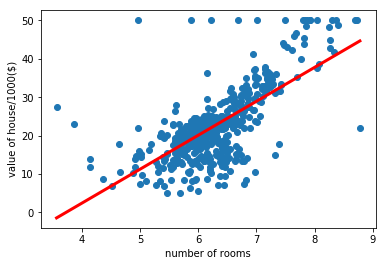

In [27]:
import matplotlib.pyplot as plt

prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1) 
plt.scatter(X_rooms,y_price)
plt.plot(prediction_space, reg_1.predict(prediction_space), color = 'red', linewidth = 3)
plt.ylabel('value of house/1000($)')
plt.xlabel('number of rooms')
plt.show()

## Logistic Regression

Classification is a very important area of supervised machine learning. A large number of important machine learning problems fall within this area. There are many classification methods, and logistic regression is one of them.

What Is Classification?
Supervised machine learning algorithms define models that capture relationships among data. Classification is an area of supervised machine learning that tries to predict which class or category some entity belongs to, based on its features.

For example, you might analyze the employees of some company and try to establish a dependence on the features or variables, such as the level of education, number of years in a current position, age, salary, odds for being promoted, and so on. The set of data related to a single employee is one observation. The features or variables can take one of two forms:

Independent variables, also called inputs or predictors, don’t depend on other features of interest (or at least you assume so for the purpose of the analysis).  
Dependent variables, also called outputs or responses, depend on the independent variables.

The nature of the dependent variables differentiates regression and classification problems. Regression problems have continuous and usually unbounded outputs. An example is when you’re estimating the salary as a function of experience and education level. On the other hand, classification problems have discrete and finite outputs called classes or categories. For example, predicting if an employee is going to be promoted or not (true or false) is a classification problem.

There are two main types of classification problems:


*   Binary or binomial classification: exactly two classes to choose between (usually 0 and 1, true and false, or positive and negative)
*   Multiclass or multinomial classification: three or more classes of the outputs to choose from


Classification Performance  
Binary classification has four possible types of results:


1.   True negatives: correctly predicted negatives (zeros)
2.   True positives: correctly predicted positives (ones)
3.   False negatives: incorrectly predicted negatives (zeros)
4.   False positives: incorrectly predicted positives (ones)

You usually evaluate the performance of your classifier by comparing the actual and predicted outputs and counting the correct and incorrect predictions.

The most straightforward indicator of classification accuracy is the ratio of the number of correct predictions to the total number of predictions (or observations). Other indicators of binary classifiers include the following:

*   The positive predictive value is the ratio of the number of true positives to the sum of the numbers of true and false positives.
*   The negative predictive value is the ratio of the number of true negatives to the sum of the numbers of true and false negatives.
*   The sensitivity (also known as recall or true positive rate) is the ratio of the number of true positives to the number of actual positives.
*   The specificity (or true negative rate) is the ratio of the number of true negatives to the number of actual negatives.

Here's a simple example of a logistic regression on Python.


In [28]:
# First, import all necessary packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In practice, you’ll usually have some data to work with. For the purpose of this example, let’s just create arrays for the input (𝑥) and output (𝑦) values:

In [30]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

print(x)
print(y)


[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 0 0 0 1 1 1 1 1 1]


Once you have the input and output prepared, you can create and define your classification model. You’re going to represent it with an instance of the class LogisticRegression:

In [31]:
model = LogisticRegression(solver='liblinear', random_state=0)

Once the model is created, you need to fit (or train) it. Model fitting is the process of determining the coefficients that correspond to the best value of the cost function. You fit the model with .fit():

In [32]:
model.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

What you see above is the obtained string representation of the fitted model.
At this point, you have the classification model defined.

You can quickly get the attributes of your model. For example, the attribute .classes_ represents the array of distinct values that y takes:

In [33]:
print(model)
print(type(model))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
<class 'sklearn.linear_model.logistic.LogisticRegression'>


In [36]:
model.classes_

array([0, 1])

This is the example of binary classification, and y can be 0 or 1, as indicated above.

You can also get the value of the slope and the intercept of the linear function like so:

In [34]:
model.intercept_

array([-1.04608067])

In [35]:
model.coef_

array([[0.51491375]])

Once a model is defined, you can check its performance with .predict_proba(), which returns the matrix of probabilities that the predicted output is equal to zero or one:

In [36]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In the matrix above, each row corresponds to a single observation. The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). The second column is the probability that the output is one, or 𝑝(𝑥).

You can get the actual predictions, based on the probability matrix and the values of 𝑝(𝑥), with .predict():

In [37]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

You can also check the score of of you model. the method .score() takes the input and output as arguments and returns the ratio of the number of correct predictions to the number of observations.

In [38]:
model.score(x, y)

0.9

In this case, you have nine out of ten observations classified correctly, and the accuracy of your model is equal to 9/10=0.9 

You can get more information on the accuracy of the model with a confusion matrix. In the case of binary classification, the confusion matrix shows the numbers of the following:



*   True negatives in the upper-left position
*   False negatives in the lower-left position
*   False positives in the upper-right position
*   True positives in the lower-right position

To create the confusion matrix, you can use confusion_matrix() and provide the actual and predicted outputs as the arguments:


In [40]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

What doest it mean? The obtained matrix shows the following:



*   Three true negative predictions: The first three observations are zeros predicted correctly.
*   No false negative predictions: These are the ones wrongly predicted as zeros.
*   One false positive prediction: The fourth observation is a zero that was wrongly predicted as one.
*   Six true positive predictions: The last six observations are ones predicted correctly.


It’s often useful to visualize the confusion matrix. You can do that with .imshow() from Matplotlib, which accepts the confusion matrix as the argument:

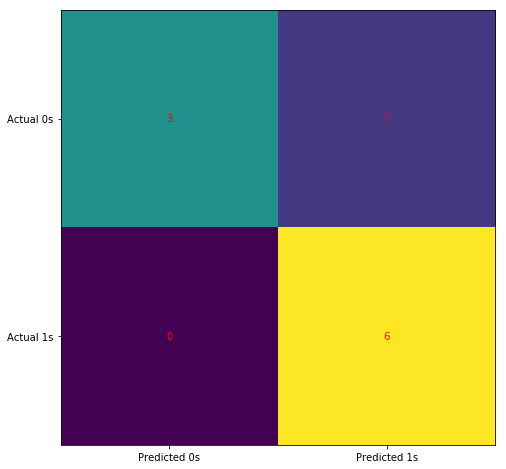

In [41]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

You can get a more comprehensive report on the classification with classification_report():



In [42]:
classification_report(y, model.predict(x))
print(classification_report(y, model.predict(x)))
display(classification_report(y, model.predict(x)))

precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

   micro avg       0.90      0.90      0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



'              precision    recall  f1-score   support\n\n           0       1.00      0.75      0.86         4\n           1       0.86      1.00      0.92         6\n\n   micro avg       0.90      0.90      0.90        10\n   macro avg       0.93      0.88      0.89        10\nweighted avg       0.91      0.90      0.90        10\n'

## Decision Tree

Decision trees can automatically deduce rules that best express the inner-workings of decision-making. When trained on a labeled dataset, decision trees learn a tree of rules (i.e. a flowchart) and follow this tree to decide on the output of any given input. Their simplicity and high-interpretability make them a great asset to have in your ML toolbox.

For this example, we’ll be working with what has to be the most popular dataset in the field of machine learning, the **iris dataset from UC Irvine Machine Learning Repository**.

We seek a tree of rules, similar to a flowchart, that best explains the relationship between features of a flower and its type. Each rule will be a node in this tree and divide flowers into disjoint sets, such as flowers with long or short sepals, flowers with wide or narrow sepals, flowers with long or short petals and flowers with wide or narrow petals. A rule can be based on multiple features as well, such as flowers with long petals and narrow sepals. Therefore, the space of all possible trees is huge and we need simplifications to computationally tackle the learning.

We first divide the data into two splits as best as we can and then consider each split separately for the division again. We continue dividing the splits until a pre-defined condition such as maximum depth is satisfied. The constructed tree is only an approximation of the best tree due to simplifications and greedy rule search.

Let's see Python in action to make it clearer!

In [53]:
# Import necessary packages
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

In [54]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

Let's take a look at our dataset

In [55]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Although, decision trees can handle categorical data, we still encode the targets in terms of digits (i.e. setosa=0, versicolor=1, virginica=2) in order to create a confusion matrix at a later point. Fortunately, the pandas library provides a method for this very purpose.

In [56]:
print("y=\n", y)
y = pd.get_dummies(y)
print(y)

y=
 [setosa, setosa, setosa, setosa, setosa, ..., virginica, virginica, virginica, virginica, virginica]
Length: 150
Categories (3, object): [setosa, versicolor, virginica]
     setosa  versicolor  virginica
0         1           0          0
1         1           0          0
2         1           0          0
3         1           0          0
4         1           0          0
..      ...         ...        ...
145       0           0          1
146       0           0          1
147       0           0          1
148       0           0          1
149       0           0          1

[150 rows x 3 columns]


We’ll want to evaluate the performance of our model. Therefore, we set a quarter of the data aside for testing.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Next, we create and train an instance of the DecisionTreeClassifer class. We provide the y values because our model uses a supervised machine learning algorithm.

In [58]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
#dt.fit(X_train, y_train)

We can view the actual decision tree produced by our model by running the following block of code.

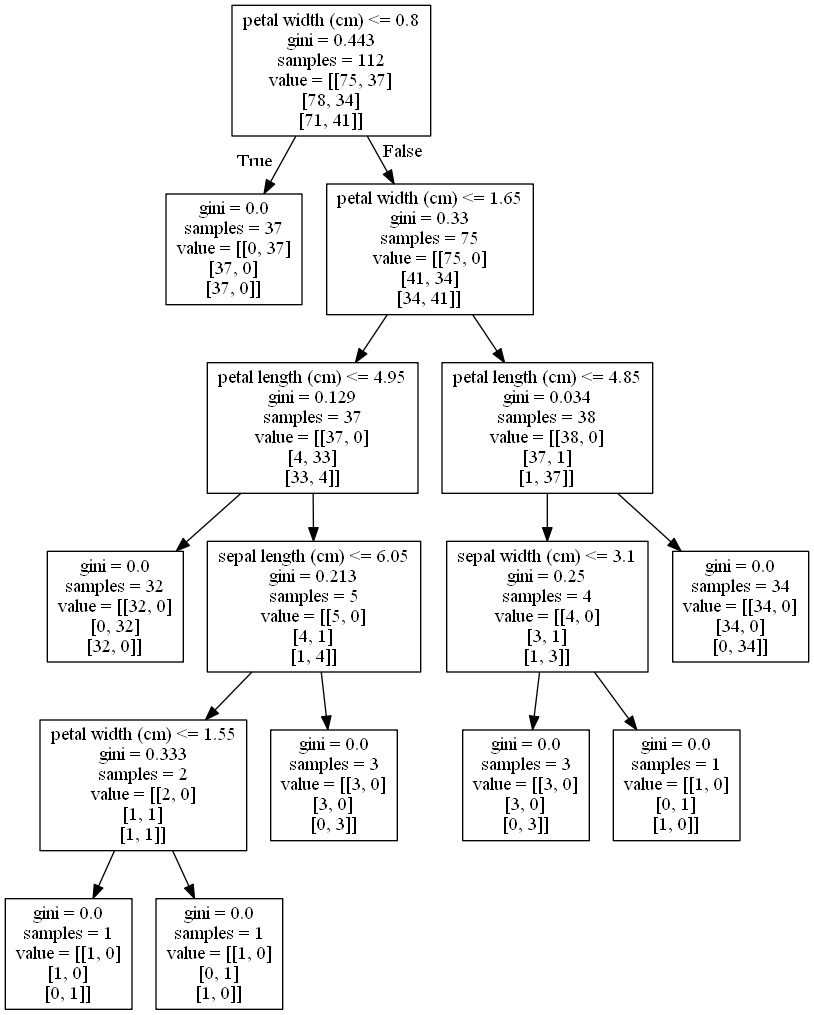

In [59]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=iris.feature_names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Let’s see how our decision tree does when its presented with test data.

In [54]:
y_pred = dt.predict(X_test)

Once again, let's use the confusion matrix to visualize our results.

In [55]:
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

## Clustering

Sometimes, rather than ‘making predictions’, we instead want to categorize data into buckets, but we have no clue what the buckets should be labelled and many of them would adequately classify our data. Clustering is the answer to this kind of problem because it's an unsupervised learning algorithm which divides our data in little groups (clusters).

Let’s implement k-means clustering using our favourite dataset: the Iris dataset.

In [64]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

Let's load the data set and look at what we're working with.

In [65]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Now we select all four features (sepal length, sepal width, petal length, and petal width) of the dataset in a variable called x so that we can train our model with these features. For this, we use the iloc function on df, and the column index (0,1,2,3) for the above four columns are used, as shown below:

In [66]:
x = iris_df.iloc[:, [0,1,2,3]].values

There’s a method called the `Elbow` method, which is designed to help find the optimal number of clusters in a dataset. So let’s use this method to calculate the optimum value of k. To implement the Elbow method, we need to create some Python code, and we’ll plot a graph between the number of clusters and the corresponding error value.
This graph generally ends up shaped like an elbow, hence its name.

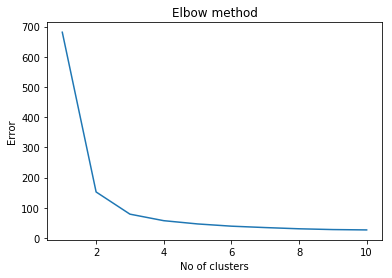

In [67]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

The output graph of the Elbow method is shown above. Note that the shape of elbow is approximately formed at k=3.

As you can see, the optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.
Let’s implement k-means again using k=3

In [68]:
kmeans3 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans3 = kmeans3.fit_predict(x)

In [69]:
kmeans3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Finally, its time to visualize the three clusters that were formed with the optimal k value. You can clearly see three clusters in the image below, with each cluster represented by a different color.

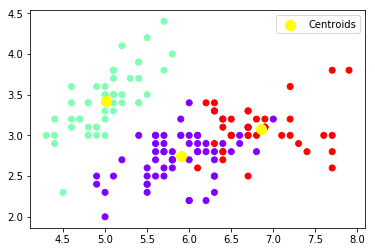

In [71]:
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, cmap='rainbow')
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

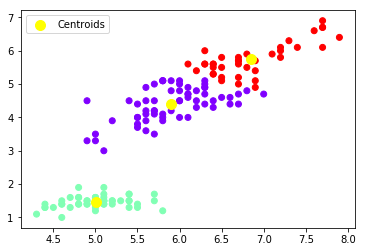

In [72]:
plt.scatter(x[:, 0], x[:, 2], c=y_kmeans3, cmap='rainbow')
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:,2], s = 100, c = 'yellow', label = 'Centroids')

 

plt.legend()

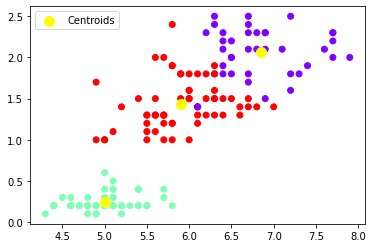

In [66]:
plt.scatter(x[:, 0], x[:, 3], c=y_kmeans3, cmap='rainbow')
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:,3], s = 100, c = 'yellow', label = 'Centroids')

 

plt.legend()